## Import packages 

In [1]:
from defs import *
from scipy import *

from prepare import load_object, save_object
from defs import Case, Interface2D
from phase import extract_phase
import numpy as np
import scipy
from prepare import field
from defs import Case, Interface2D
import gc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from funciones import * #in this file I have all functions I need here and I modify read_eta to take more "decimals" in time 


import pandas as pd
import math

from matplotlib import pyplot as plt
from scipy.signal import butter,filtfilt , hilbert

import sys, os
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/windwave/')
# sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from tqdm import tqdm

"""Use customized plotting theme"""

import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')


## Pick a case

In [2]:
case7 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.3, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_boundary_')
case7.tstart = 43

/projects/DEIKE/jiarongw/turbulence/rerun/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.3_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.29296, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 40.5, uemax = 0.075 



#### Load the case

In [3]:
version = '_tiger'
picklename = case7.path + 'case_main' + version + '.pkl'
case7 = load_object(picklename)

#### Read field

In [4]:
time = np.arange(45,76,1)
field (case7, time)
gc.collect()

  0%|          | 0/31 [00:00<?, ?it/s]

Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


  3%|▎         | 1/31 [00:11<05:46, 11.53s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


  6%|▋         | 2/31 [00:22<05:18, 10.99s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 10%|▉         | 3/31 [00:32<05:03, 10.83s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 13%|█▎        | 4/31 [00:43<04:49, 10.72s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 16%|█▌        | 5/31 [00:53<04:36, 10.65s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 19%|█▉        | 6/31 [01:04<04:27, 10.69s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 23%|██▎       | 7/31 [01:15<04:15, 10.63s/it]

127


/projects/DEIKE/cmartinb/jupyter_notebook/project_specific/turbulence/funciones.py:80: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interface = Interface2D(L0 = 2*np.pi, N = 512, path = case.path,


Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 26%|██▌       | 8/31 [01:25<04:03, 10.60s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 29%|██▉       | 9/31 [01:36<03:53, 10.61s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 32%|███▏      | 10/31 [01:47<03:43, 10.65s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 35%|███▌      | 11/31 [01:57<03:33, 10.68s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 39%|███▊      | 12/31 [02:08<03:22, 10.66s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 42%|████▏     | 13/31 [02:18<03:11, 10.61s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 45%|████▌     | 14/31 [02:29<03:00, 10.62s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 48%|████▊     | 15/31 [02:40<02:49, 10.60s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 52%|█████▏    | 16/31 [02:51<02:40, 10.69s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 55%|█████▍    | 17/31 [03:01<02:29, 10.71s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 58%|█████▊    | 18/31 [03:12<02:19, 10.71s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 61%|██████▏   | 19/31 [03:23<02:08, 10.72s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 65%|██████▍   | 20/31 [03:34<01:58, 10.76s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 68%|██████▊   | 21/31 [03:44<01:47, 10.71s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 71%|███████   | 22/31 [03:55<01:36, 10.69s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 74%|███████▍  | 23/31 [04:05<01:24, 10.62s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 77%|███████▋  | 24/31 [04:16<01:14, 10.57s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 81%|████████  | 25/31 [04:26<01:02, 10.47s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 84%|████████▍ | 26/31 [04:36<00:52, 10.41s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 87%|████████▋ | 27/31 [04:46<00:41, 10.35s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 90%|█████████ | 28/31 [04:57<00:30, 10.29s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 94%|█████████▎| 29/31 [05:07<00:20, 10.29s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


 97%|█████████▋| 30/31 [05:17<00:10, 10.24s/it]

127
Pruning points above 1.1!
pickle restored!
pickle restored!
pickle restored!


100%|██████████| 31/31 [05:27<00:00, 10.57s/it]

127


0

In [5]:
#time for eta data
nf = (np.arange(45, 76, 0.1)).shape[0]
print(nf)

310


#### Read eta data

In [6]:
case7.eta_series(nframe=nf, tstart=45, dt=0.1)

 17%|█▋        | 52/310 [02:50<14:09,  3.29s/it]/projects/DEIKE/cmartinb/jupyter_notebook/project_specific/turbulence/defs.py:82: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interface = Interface(self.L0, self.N, self.path, self.t[i], PRUNING=PRUNING)
100%|██████████| 310/310 [16:57<00:00,  3.28s/it]


# Shape $\eta (x,y)$ 

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


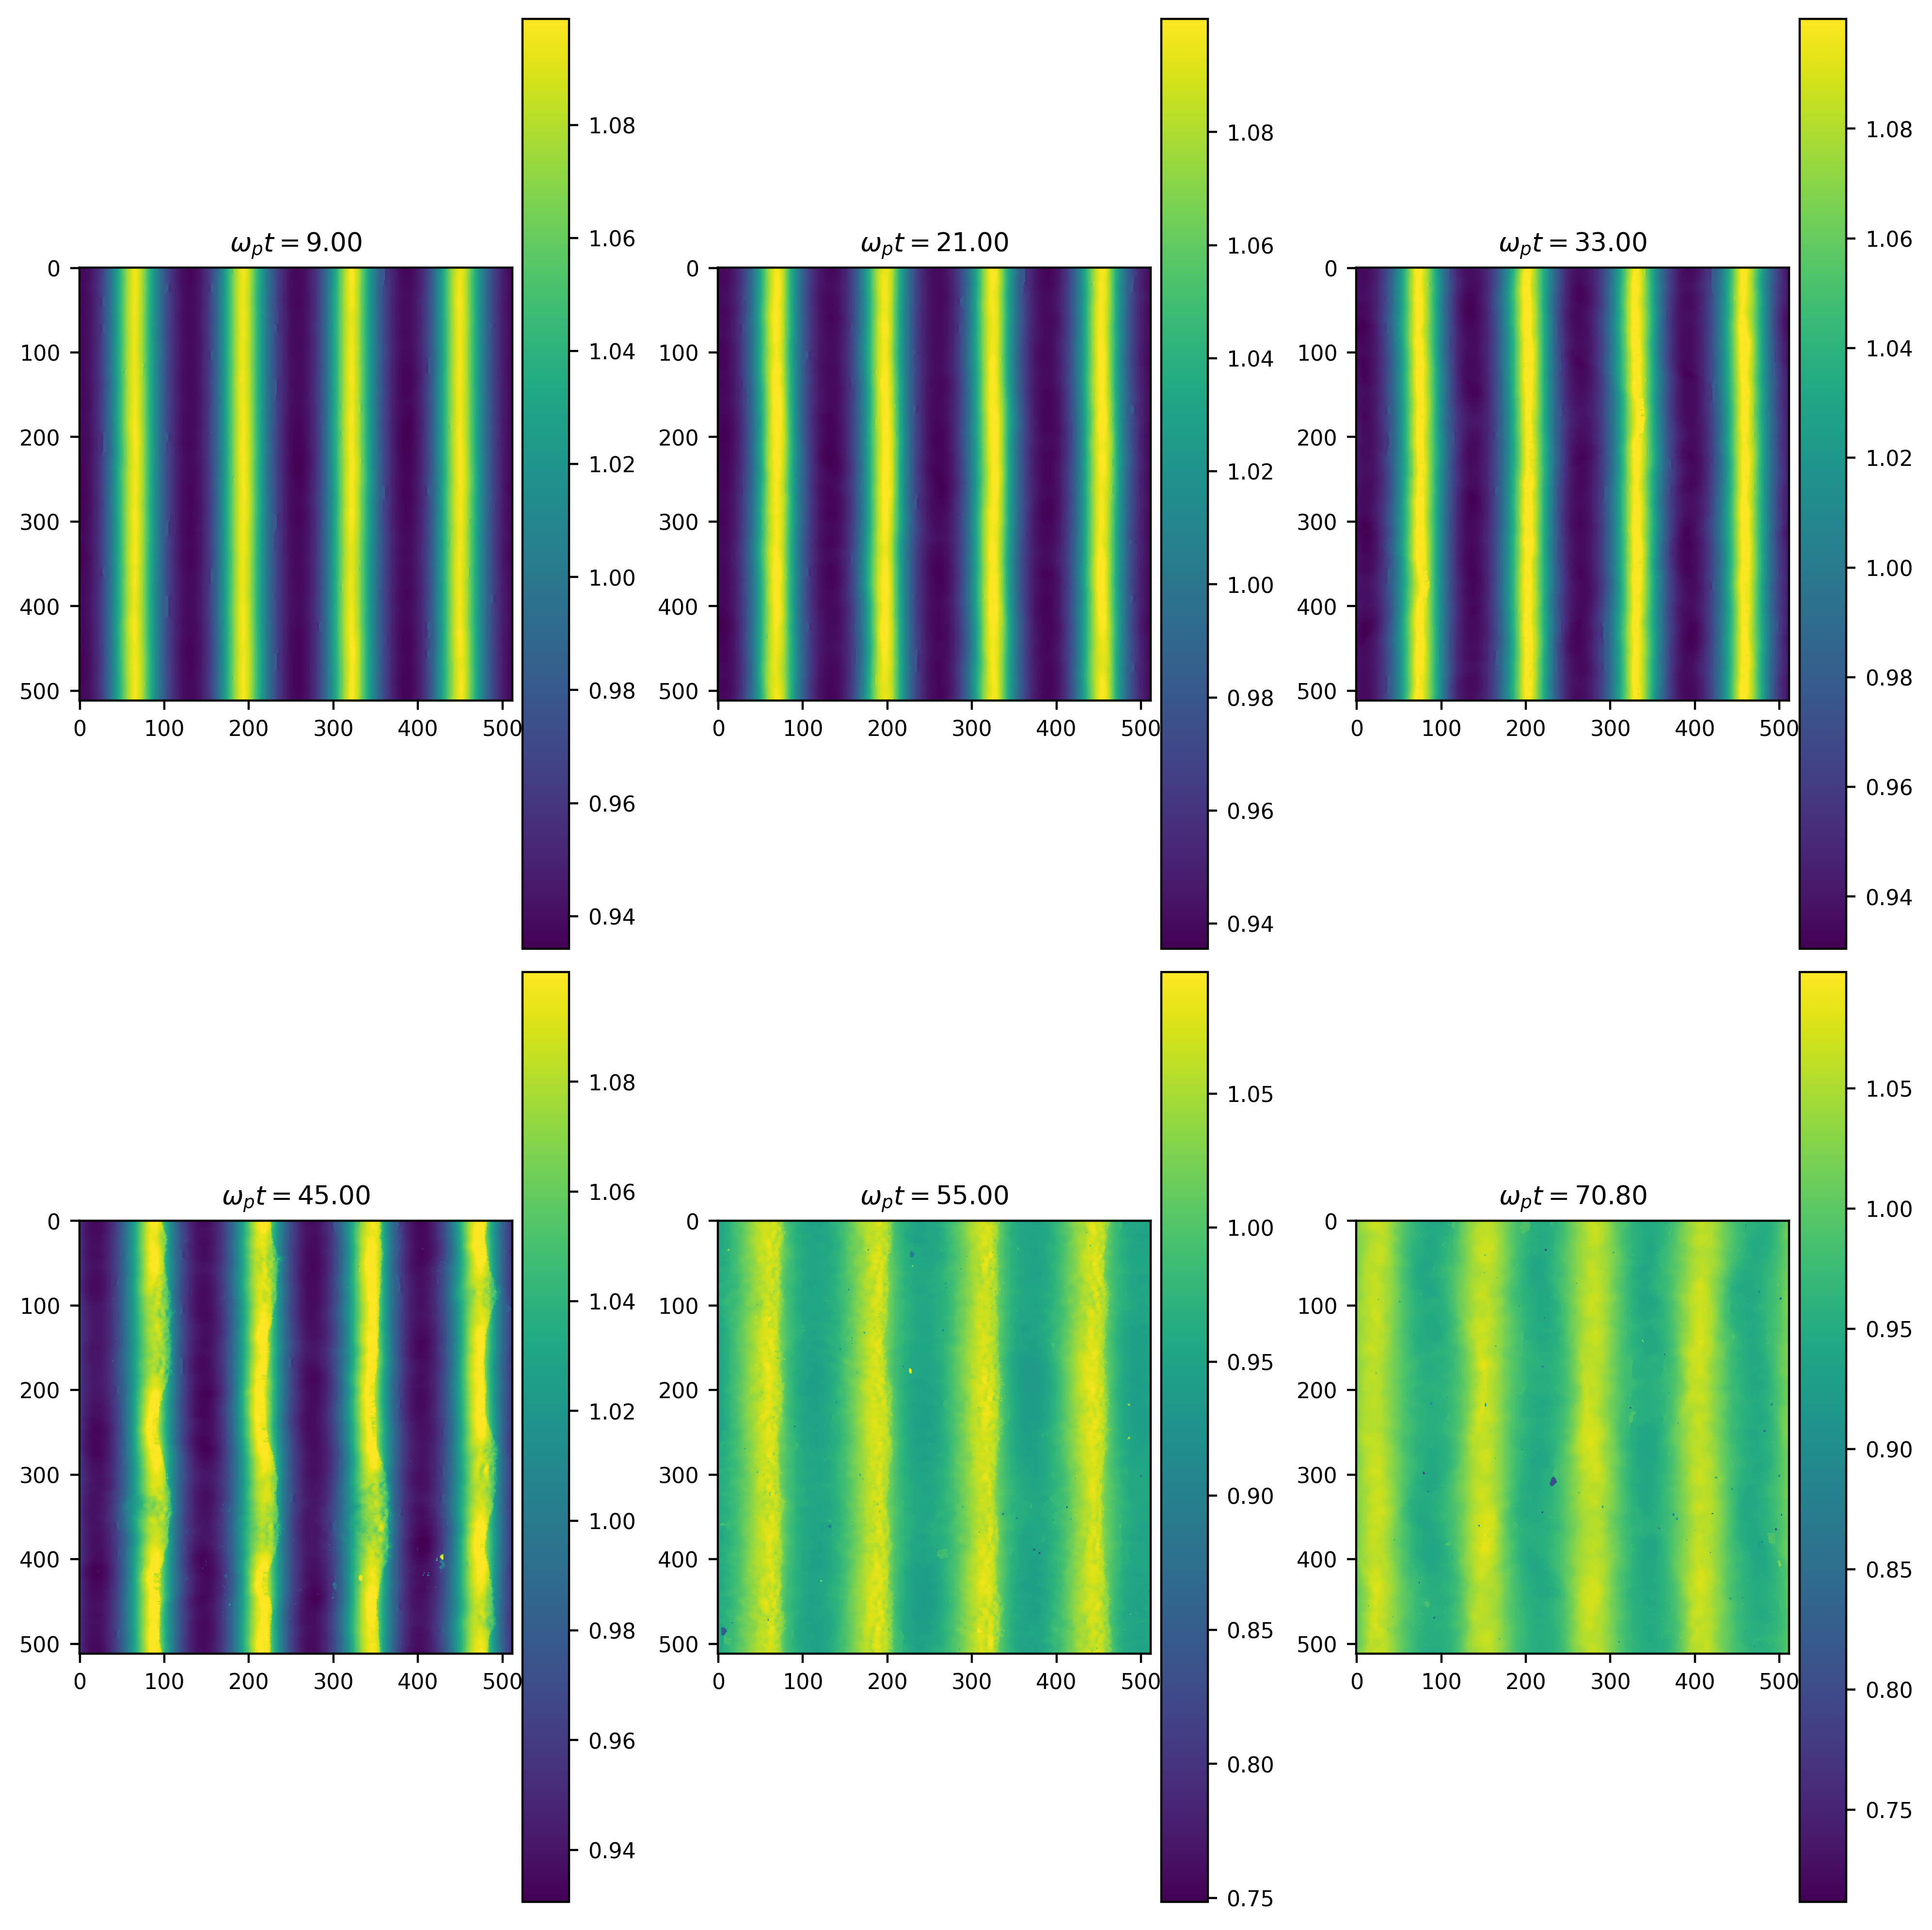

In [7]:

ind_time = [0,60,120,180,230,-1] #index of the times we are interested in (depends on length of time) 
kp = 4; omegap = (1*kp)**0.5

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

j = 0

for i in ind_time:
    eta = read_eta(case7, case7.t[i])
    plt.imshow(eta)
 
    ax = axes[j // num_cols, j % num_cols]
    tstart=case7.tstart
    
    #eta graph
    im = ax.imshow(eta)  

    ax.set_title(label=r'$\omega_{p} t=%.2f$'%(omegap*(case7.t[i]-tstart))) # Agregar un título al subplot
    
    fig.colorbar(im , ax=ax, orientation='vertical', pad=0.02)

    j += 1
    

plt.tight_layout()
#plt.savefig("g1_tend", dpi=300)
plt.show()

## E(kx,ky): Energy in Cartesian coordinates

$\eta(x,y) \rightarrow FFT \rightarrow  \hat{\eta}(kx,ky) \rightarrow E(kx,ky) = |\hat{\eta}(kx,ky)|^{2}$

In [8]:

#initialization of lists for checking

variance =[]
integral = []
polar_integral = []

kp = 4; omegap = (1*kp)**0.5

def spectrum_integration(eta, N,L,CHECK=False):
    
    """ 
    Input : 
        - eta
        - N : number of points
        - L : length domain
    
    Ouput :
        - k , kx , ky , theta : wavenumber vector , his components in x and y , angle theta 
        - F_center: F(kx, ky)
        - F_center_polar: F(k,theta)
        - F_center_polar_integrated : F(k) (azimuthal integration of the 2D spectrum)
        - k_tile , theta_tile : mesh in (k,theta)
        - kxp_tile, kyp_tile : mesh in (kx,ky) from (k,theta)
        - variance, integral, polar_integral : list for checking 
    
    """
    
    varr =  np.var(eta)
    if CHECK: print('var', varr)
    variance.append(varr)
    
    #print('mean', np.mean(eta))
    
    wavenumber =  2*np.pi*np.fft.fftfreq(N,L/N)
    kx = np.fft.fftshift(wavenumber); ky = kx
    kx_tile, ky_tile = np.meshgrid(kx,ky)
    
    theta = np.linspace(-np.pi,np.pi, 100)
    
    #xs = 2*m.pi ; ys=xs
    #rmax = (xs**2 + ys**2)**0.5
    #radii = np.linspace(0, rmax, 100, endpoint=True)
    
    
    k = wavenumber[0:int(N/2)]
    dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
    dk = k[1]-k[0]; dtheta = theta[1]-theta[0]
    
    spectrum = np.fft.fft2(eta/(N*N)**0.5) # FFT normalization 
    F = np.absolute(spectrum)**2/N**2/(dkx*dky) # Per area normalization -> F(kx,ky)
    
    if CHECK: print ('sum F', np.sum(F))
    F_center = np.fft.fftshift(F,axes=(0,1)) # Further normalization by independent variables
    
    k_tile, theta_tile = np.meshgrid(k,theta)
    kxp_tile, kyp_tile = pol2cart(k_tile, theta_tile)
    
    
    
    integ = np.sum(F_center)*dkx*dky # F
    if CHECK: print('integral',integ)
    integral.append(integ)
    
    
    F_center_polar = scipy.interpolate.griddata((kx_tile.ravel(),ky_tile.ravel()), F_center.ravel(), (kxp_tile, kyp_tile), method='nearest', fill_value=0) #F(k,theta)
    
    F_center_polar_integrated = np.sum(F_center_polar*k_tile, axis=0)*dtheta # Azimuthal integration
    int_pol = np.sum(F_center_polar_integrated)*dk # F
    if CHECK: print ('sum polar integrated', int_pol)
    
    
    if CHECK: print('F center', F_center.shape , 'F polar', F_center_polar.shape , 'F center polar integrated' , F_center_polar_integrated.shape)
    
    polar_integral.append(int_pol)
    
    return k, F_center, F_center_polar_integrated , F_center_polar , k_tile, kxp_tile, kyp_tile , theta_tile , theta , variance, integral, polar_integral , kx, ky

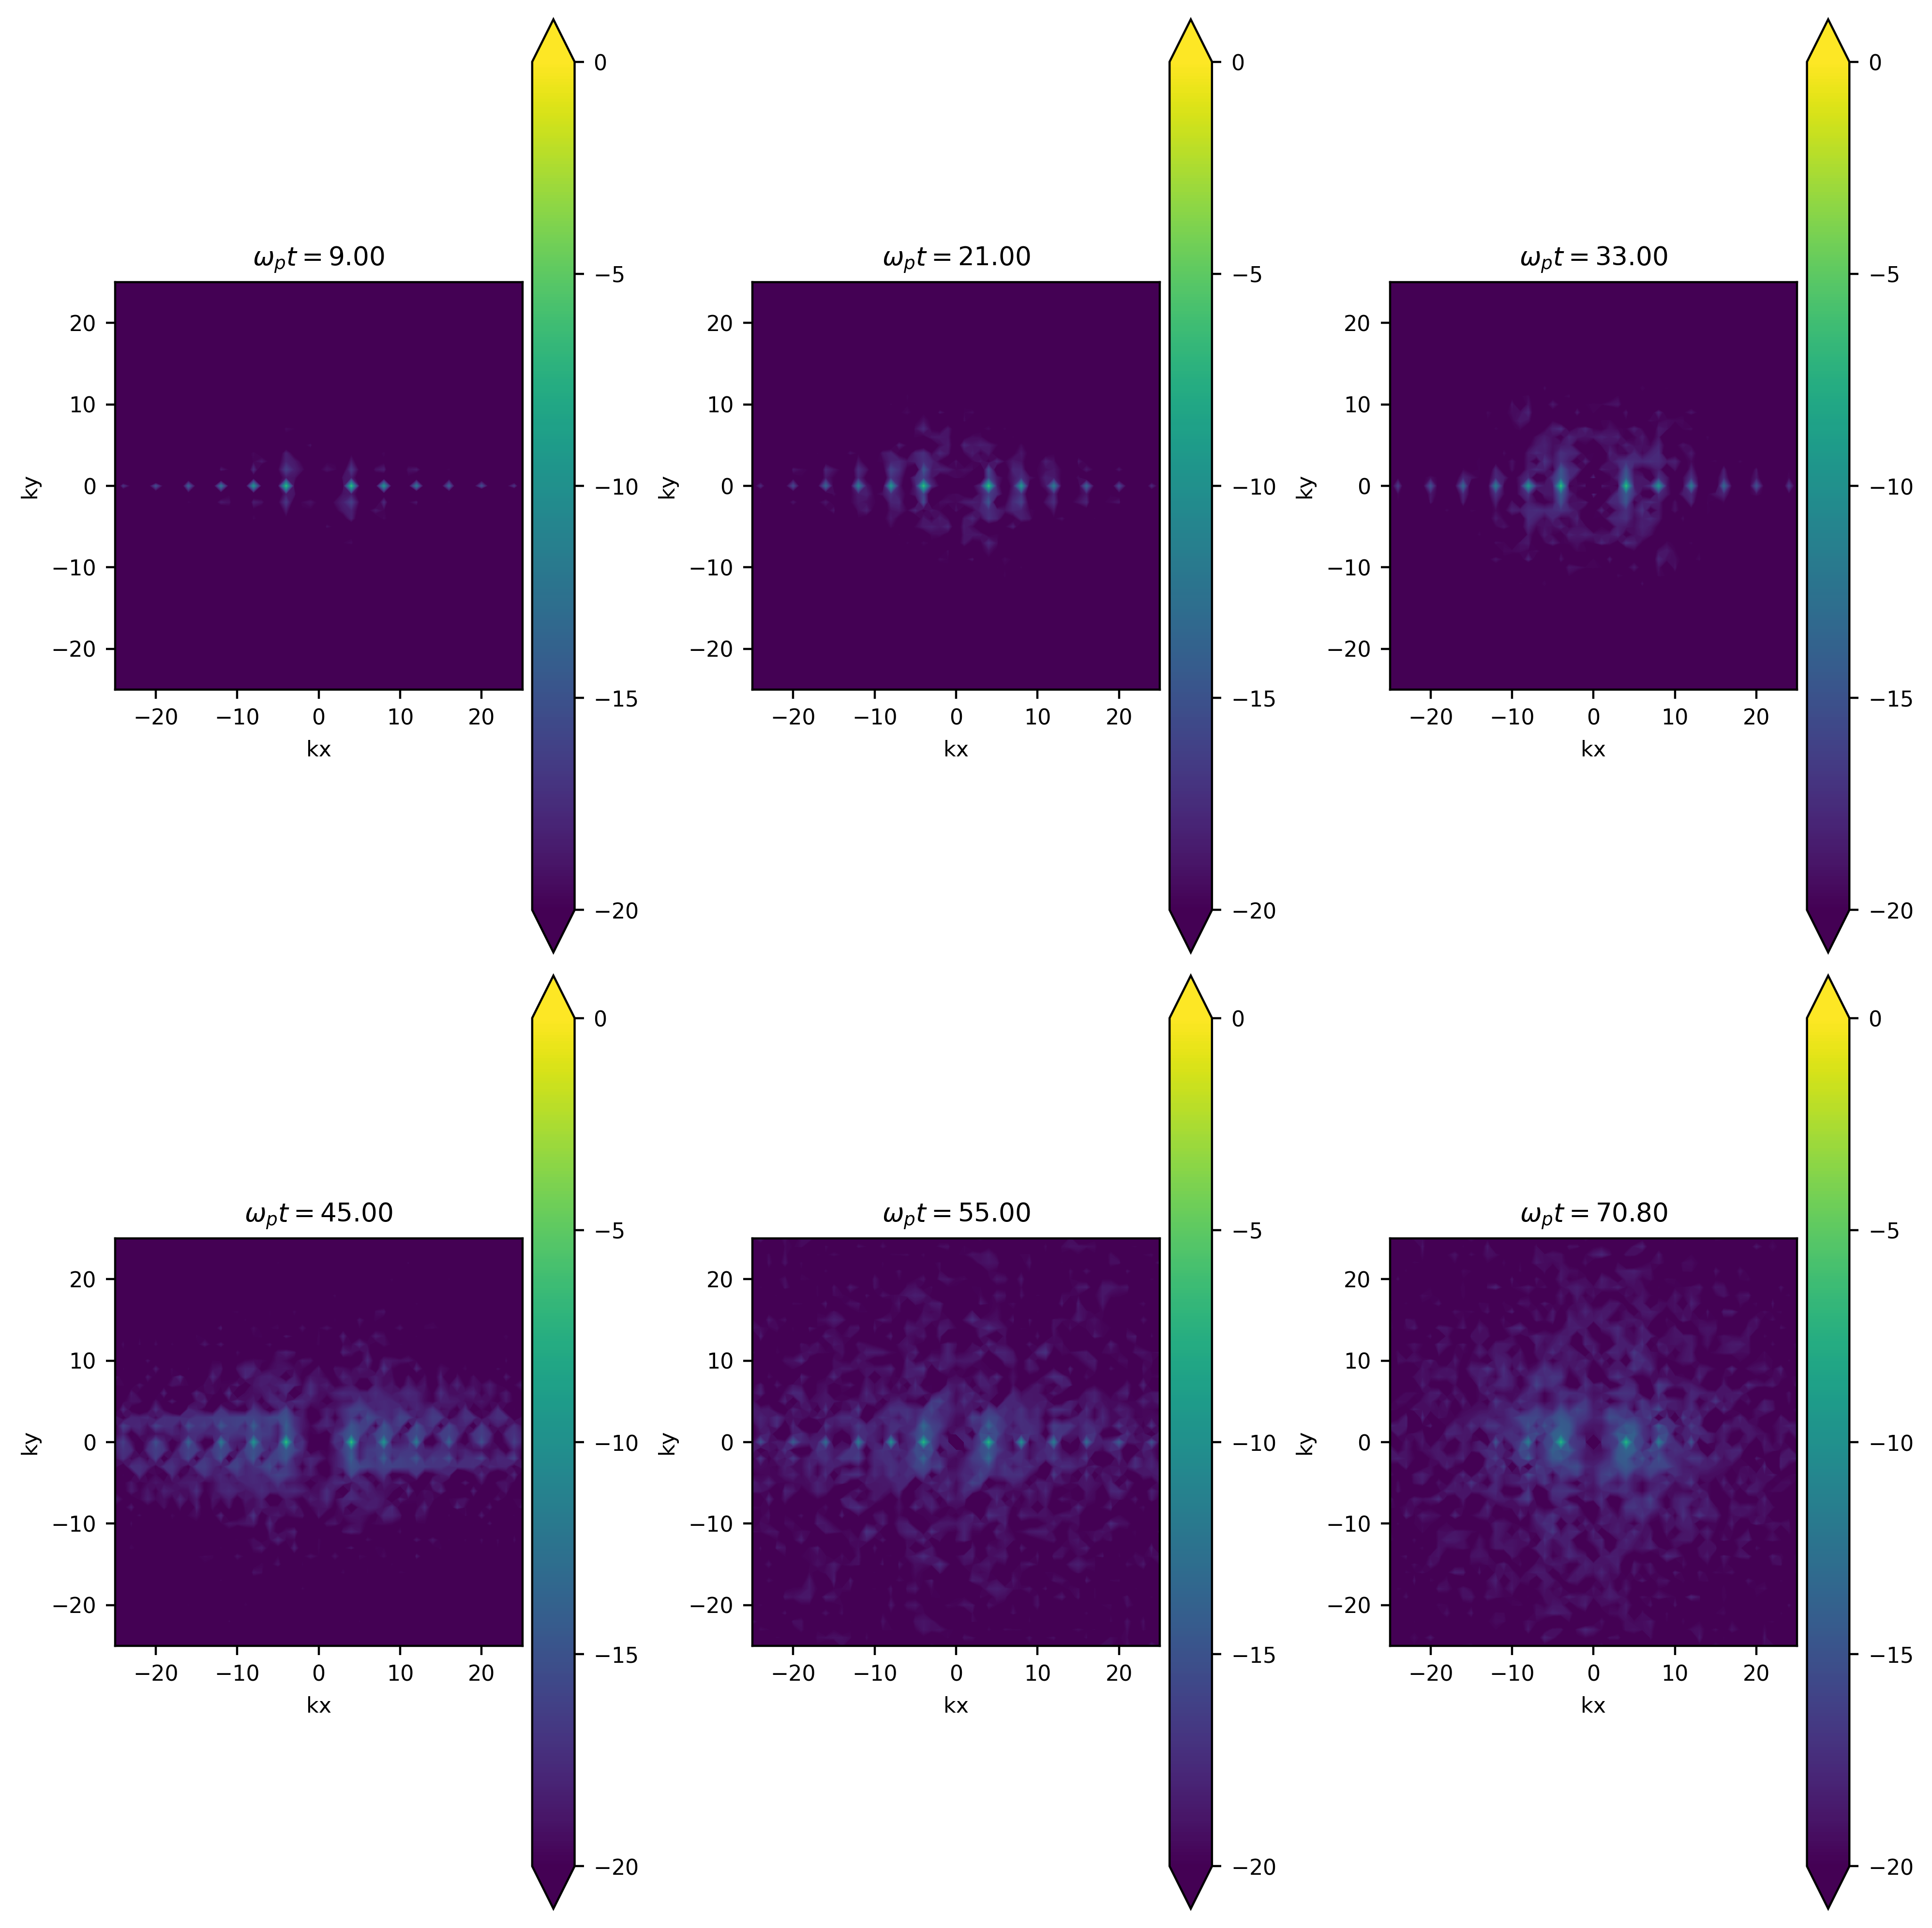

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

j = 0

N = 512
L = 2 * np.pi
lim = 200

for i in ind_time:
    eta = read_eta(case7, case7.t[i])
    
    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, variance, integral, polar_integral, kx, ky = spectrum_integration(eta - np.mean(eta), N, L, CHECK=False)
    
    norm = np.argmax(F_center)
    
    vmin = -20
    vmax = 0
    levels = np.linspace(vmin, vmax, 300)
    
    ax = axes[j // num_cols, j % num_cols]
    
    im = ax.contourf(kx, ky, np.log(F_center), levels=levels, extend='both')
    
    ax.set_aspect('equal')
    ax.set_title(label=r'$\omega_{p} t=%.2f$' % (omegap * (case7.t[i] - tstart)))
    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}$'))
    cbar.ax.yaxis.set_major_locator(plt.FixedLocator([-20, -15, -10, -5, 0]))
    
    j += 1
    
plt.tight_layout()
plt.show()


## E(k,$\theta$): 

var 0.0028073203700970236
sum F 0.0028073203700968627
integral 0.0028073203700970236
sum polar integrated 0.0028590649019509615
F center (512, 512) F polar (100, 256) F center polar integrated (256,)
var 0.0029415028455235153
sum F 0.002941502845523347
integral 0.0029415028455235157
sum polar integrated 0.0029967512727947405
F center (512, 512) F polar (100, 256) F center polar integrated (256,)
var 0.0030689562671815723
sum F 0.003068956267181398
integral 0.003068956267181574
sum polar integrated 0.0031263409140333464
F center (512, 512) F polar (100, 256) F center polar integrated (256,)
var 0.002947816921071252
sum F 0.002947816921071084
integral 0.0029478169210712508
sum polar integrated 0.0030041589363482115
F center (512, 512) F polar (100, 256) F center polar integrated (256,)
var 0.001889433980122831
sum F 0.001889433980122724
integral 0.0018894339801228315
sum polar integrated 0.0019267037581103563
F center (512, 512) F polar (100, 256) F center polar integrated (256,)
var 0.0

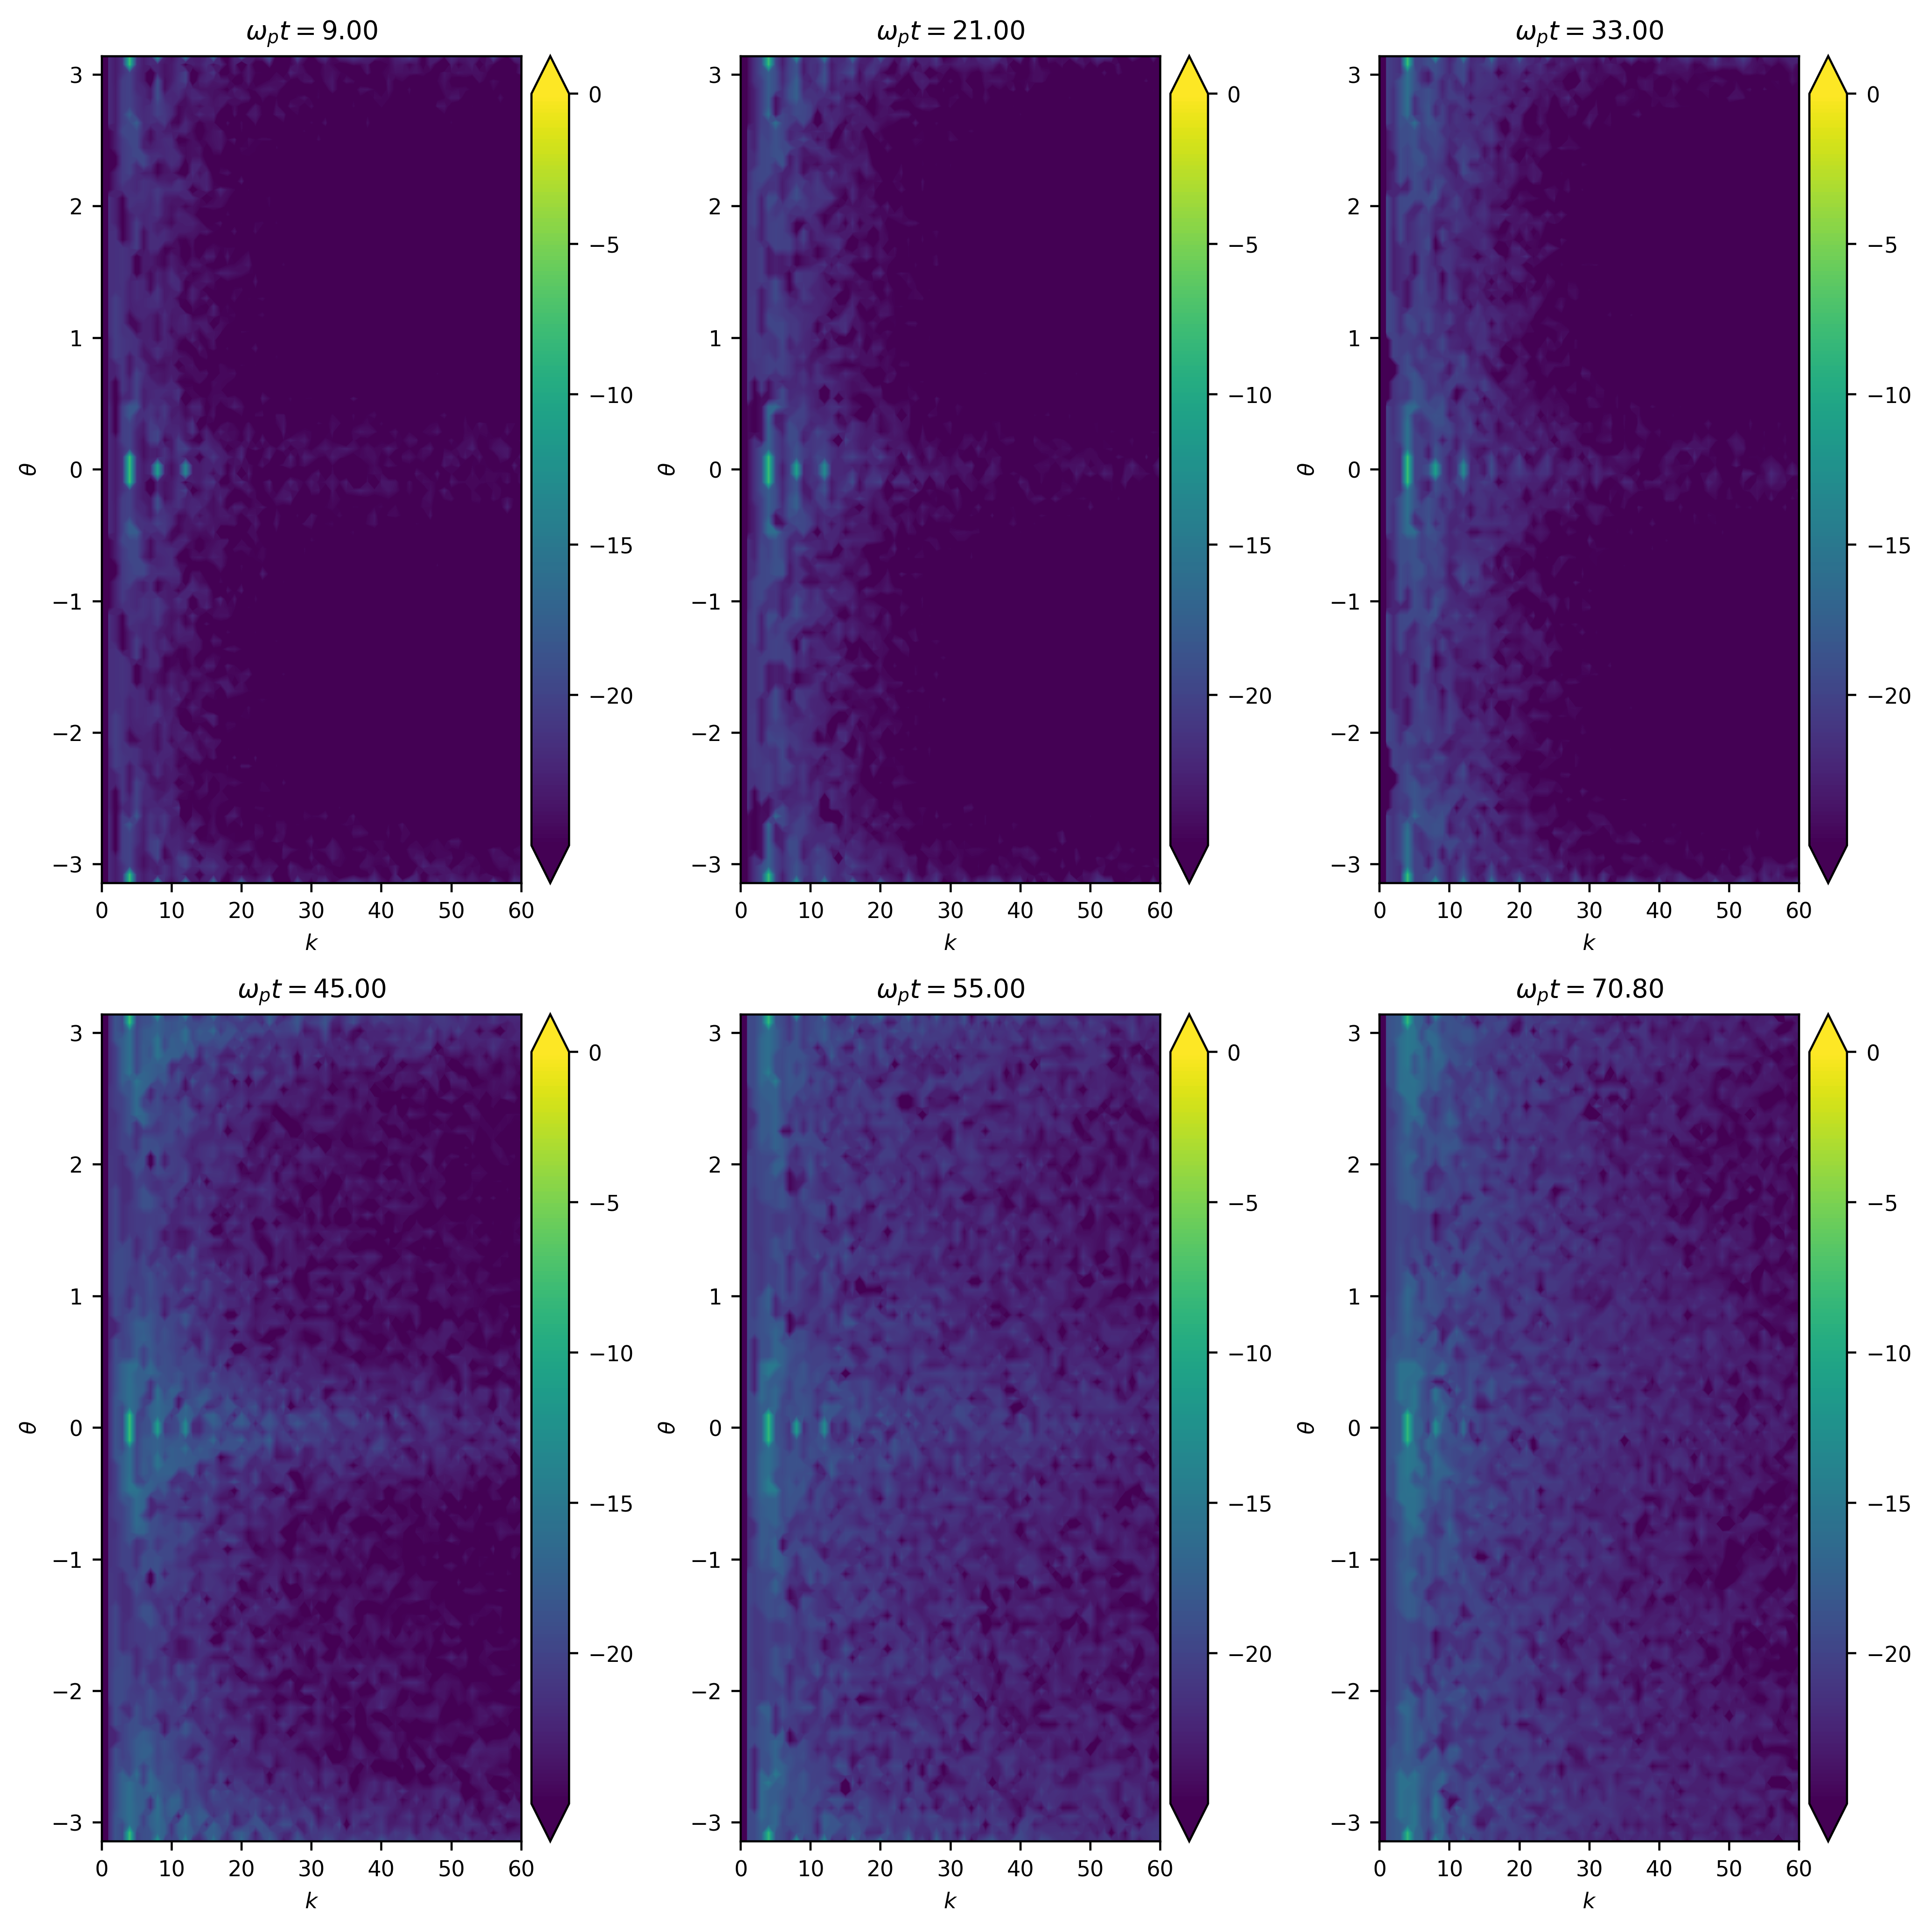

In [10]:
num_rows = 2
num_cols = 3
tstart=case7.tstart


N = 512
L = 2*m.pi

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

j = 0

variance =[]
integral = []
polar_integral = []

for i in ind_time:
    eta = read_eta(case7, case7.t[i])
    
    k, F_center, F_center_polar_integrated , F_center_polar , k_tile, kxp_tile, kyp_tile , theta_tile , theta , variance, integral, polar_integral , kx, ky = spectrum_integration(eta-np.mean(eta), N,L,CHECK=True)
    
    vmin = -25
    vmax= 0
    levels = np.linspace(vmin, vmax, 200)
    
    norm = np.argmax(F_center_polar)
    
    plt.contourf(k_tile,theta_tile,np.log(F_center_polar/norm), levels=levels,  extend='both' )#, cmap='viridis')
    
    ax = axes[j // num_cols, j % num_cols]

    im = ax.contourf(k_tile,theta_tile,np.log(F_center_polar/norm), levels=levels ,  extend='both')#, cmap='viridis')
    
    #ax.scatter(4,0,marker ='*', s=1, alpha= 1, c='r' )
    
    ax.set_title(label=r'$\omega_{p} t=%.2f$'%(omegap*(case7.t[i]-tstart)))
    
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}$'))
    cbar.ax.yaxis.set_major_locator(plt.FixedLocator([-20, -15, -10, -5, 0]))
    
    ax.set_xlim([0,60])
    ax.set_xlabel('$k$')
    ax.set_ylabel(r"$ \theta $")
    j += 1
    

plt.tight_layout()
#plt.savefig("g1_tend", dpi=300)
plt.show()

## E(k): Spectral energy density 

Now we integrate the energy along the angle theta in order to obtain the energy in function of k $ \rightarrow E(k) = \int |\hat{\eta}(k,\theta)|^{2} k d\theta $

310


/tmp/ipykernel_714567/920511038.py:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  eta = read_eta(case7, case7.t[i])
/tmp/ipykernel_714567/920511038.py:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  eta = read_eta(case7, case7.t[i])
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


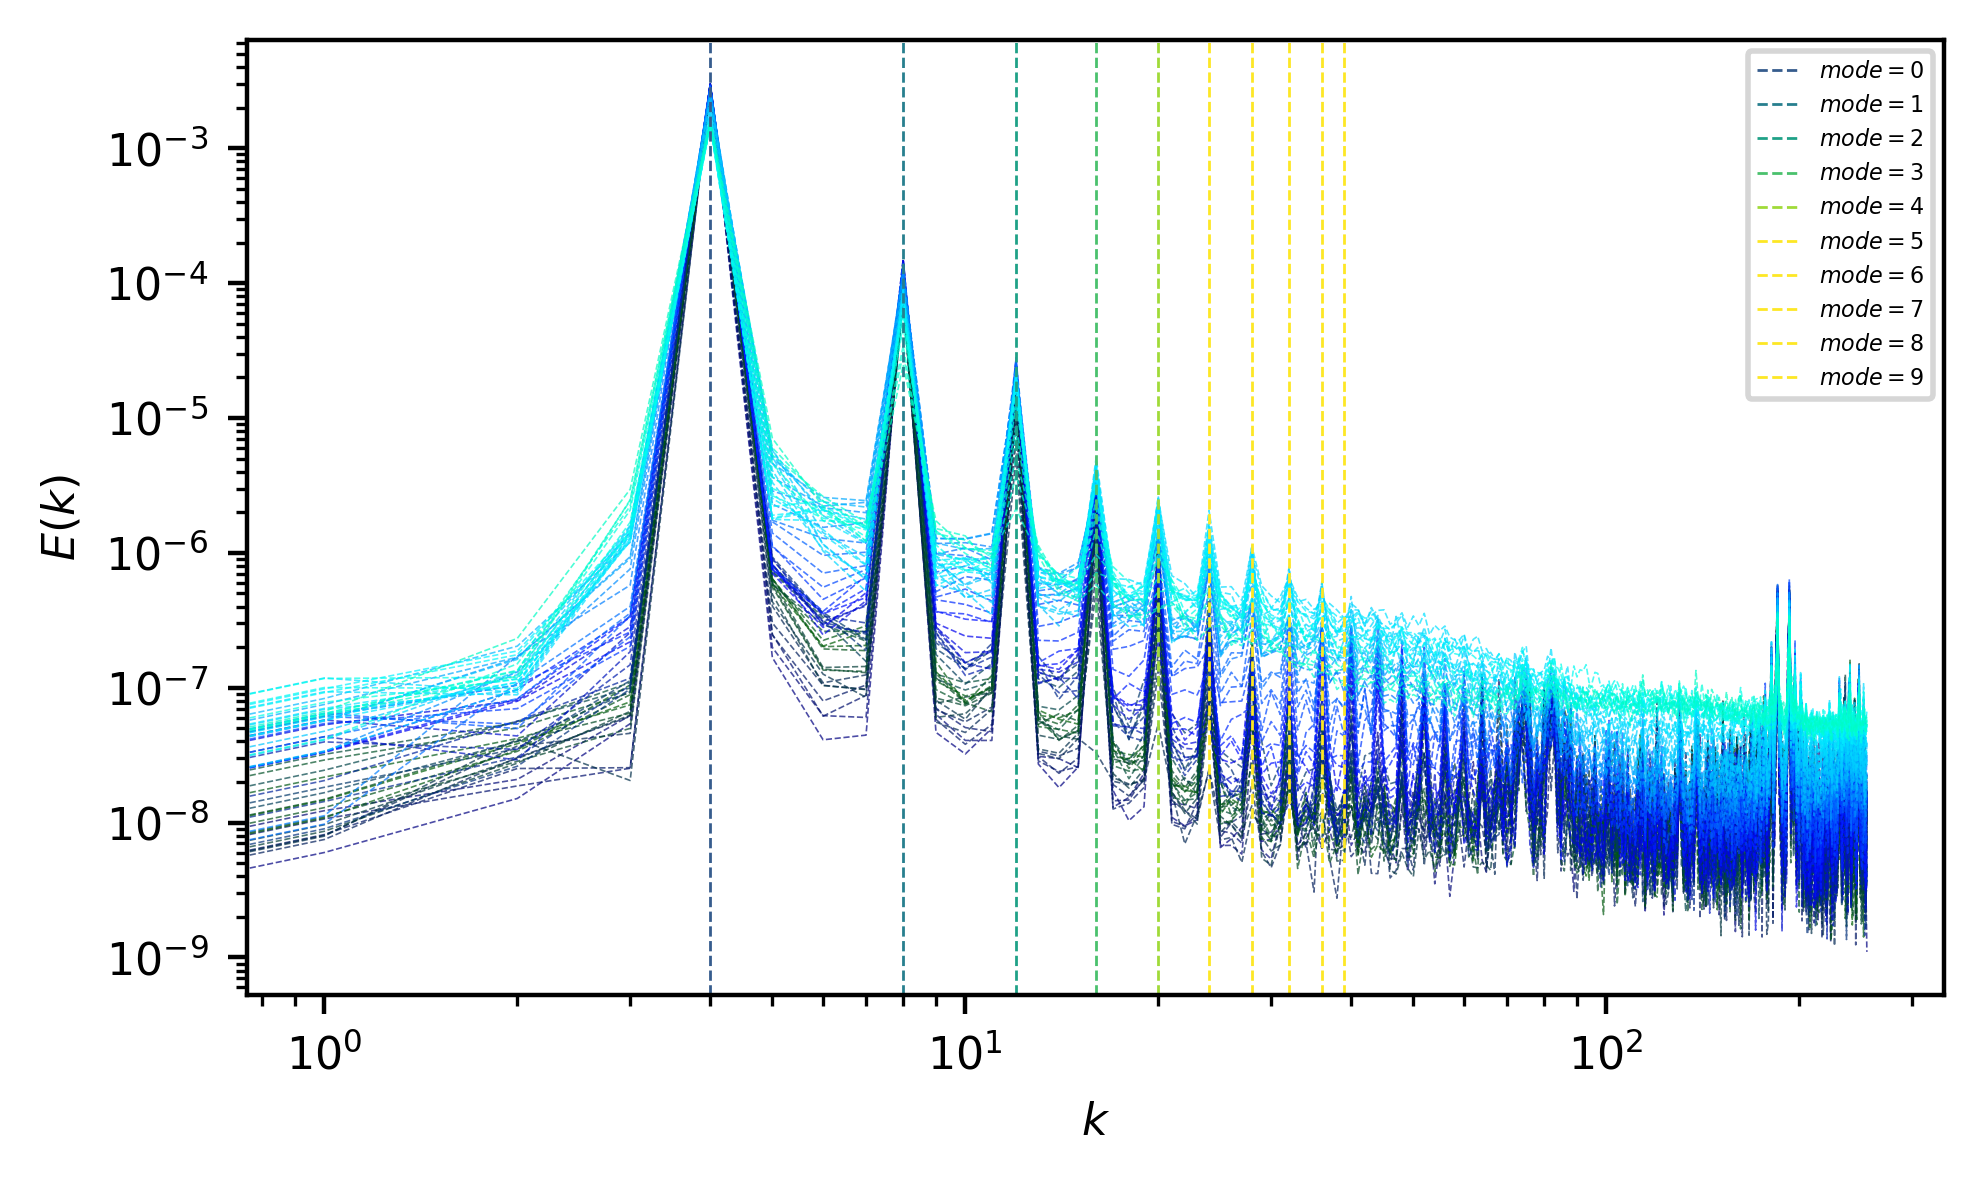

In [14]:
from scipy.signal import argrelextrema, argrelmax

import matplotlib.cm as cm

fig = plt.figure(figsize = [5,3]); ax = fig.gca()

time = case7.t
print(time.shape[0])
ind_time = np.arange(0,time.shape[0],5)
num_rows = 2
num_cols = 3

N = 512
L = 2*m.pi
tstart=case7.tstart

j = 0

variance =[]
integral = []
polar_integral = []

#modes growth
energy_mode = []
coordx_mode = []


filtered_coordx_mode = []
filtered_energy_mode = []
    
for i in ind_time:
    
    eta = read_eta(case7, case7.t[i])
    
    time = case7.t[i]
    
    k, F_center, F_center_polar_integrated , F_center_polar , k_tile, kxp_tile, kyp_tile , theta_tile , theta , variance, integral, polar_integral , kx, ky = spectrum_integration(eta-np.mean(eta), N,L,CHECK=False)
    
    
    indices = np.argsort(-F_center_polar_integrated)[:10]
    
    energy = (F_center_polar_integrated[indices])
    
    coordx = (k[indices])

    dk= k[1] - k[0]
    
    if i ==0:
        
        E0 = np.sum(F_center_polar_integrated)*dk

    if i ==0:
        
        max_indices = scipy.signal.argrelmax(F_center_polar_integrated)[0] #search maximum in the initial time to localize modes 
    
    filtered_coordx = [k[index] for index in max_indices if k[index] <= 40] #we take k before is to noisy 
        
    filtered_energy = [F_center_polar_integrated[index] for index in max_indices if k[index] <= 40]
    
    filtered_coordx_mode.append(filtered_coordx) #create list with coordinates nodes
    filtered_energy_mode.append(filtered_energy) #crete list with energy of the nodes
    
    
    psd = ax.plot(k , F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_ncar')(j), alpha=0.7, linewidth=0.3)# ,label=r'$\omega_{p} t=%.2f$'%(omegap*(case7.t[i]-tstart)))
    
    #plt.scatter(coordx, energy)
    
    energy_mode.append(energy.tolist())
    coordx_mode.append(coordx.tolist())
  
    
    
    j +=1

#plot where are the nodes

for a in range(len(filtered_energy_mode[0])):
    plt.axvline(x=filtered_coordx_mode[0][a], ls='--', color=plt.cm.get_cmap('viridis')((a + 2) / 7), lw=0.5 , label = r'$mode=%.0f$'%(a))
    
  
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox=False, fontsize=6)
plt.legend(loc='upper right', fontsize=4)

plt.xscale('log'); plt.yscale('log')
ax.set_xlabel('$k$')
ax.set_ylabel('$E(k)$')
#ax.set_title('ak = 0.25 g=1 mu =16')
fig.tight_layout()
#fig.savefig("spectra_ak01_tend.png", dpi=300)

## Verification

$|{\eta}(x,y)|^{2} = \int E(kx,ky) \cdot  dkx \cdot dky = \int  E(k,\theta) \cdot dk$

62 62


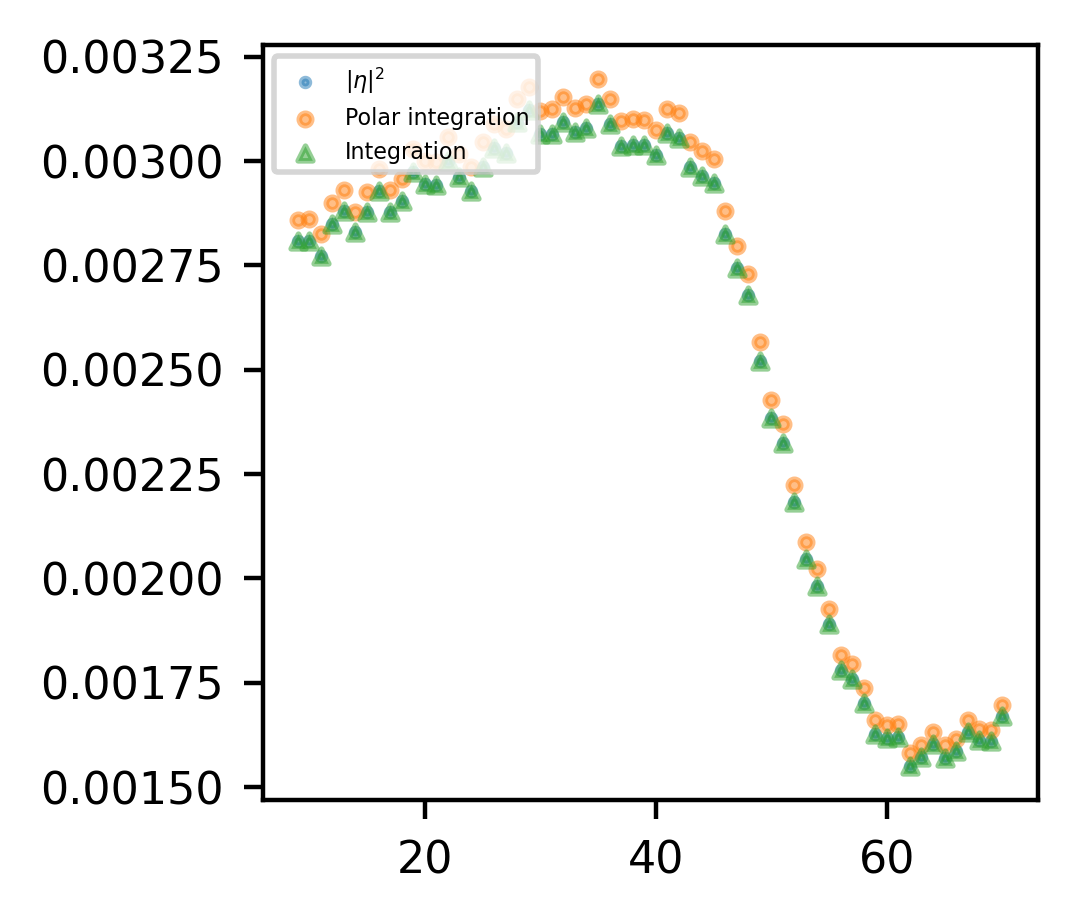

In [15]:
fig = plt.figure(figsize = [2.5,2.5]); ax = fig.gca()
tsart=case7.tstart

time = case7.t
ind_time = np.arange(0,time.shape[0],5)
tiempo = []

for i in ind_time:
    tiempo.append(omegap*(case7.t[i]-tstart))
    
print(len(tiempo), len(variance))
plt.scatter(tiempo,variance,s = 2, label = '$|\eta|^2$', alpha= 0.5)
plt.scatter(tiempo,polar_integral, s=5,label='Polar integration', alpha= 0.5)
plt.scatter(tiempo,integral, marker='^',s=7, label='Integration', alpha= 0.5)
plt.legend(loc='upper left', fontsize=4)
plt.show()

In [16]:

mode=[]
mode_derivada = []
tstart=case7.tstart

#print(len(filtered_energy_mode[0]), len(filtered_energy_mode[1]))

for i in range(len(ind_time) - 1):
    time = case7.t[ind_time[i]]
    time_plus = case7.t[ind_time[i+1]]
    energy = np.array(filtered_energy_mode[i])
    energy_plus = np.array(filtered_energy_mode[i+1])
    #print(i)
    #print('energy', energy.shape, energy_plus.shape, time_plus.shape, time.shape)
    evolution = (energy_plus - energy)/(time_plus - time)
    #print('iteration ', i, evolution)
    mode.append(energy.tolist())
    mode_derivada.append(evolution.tolist())

In [17]:
# make a list with energy and 

mode_total = []
mode_total_d = []
for j in range(len(mode[0])):
    
    mode_ord=[]
    mode_ord_d=[]
    
    for i in range(len(mode)):
        
        mode_ord.append(mode[i][j])
        mode_ord_d.append(mode_derivada[i][j])
    
    mode_total_d.append(mode_ord_d)
    mode_total.append(mode_ord)

k 4.0 slope -0.0188611926414853
k 8.0 slope -0.0005129321272007021
k 12.0 slope 6.501939675894629e-06
k 16.0 slope 1.9823658603241686e-05
k 20.0 slope 1.7314936882555603e-05


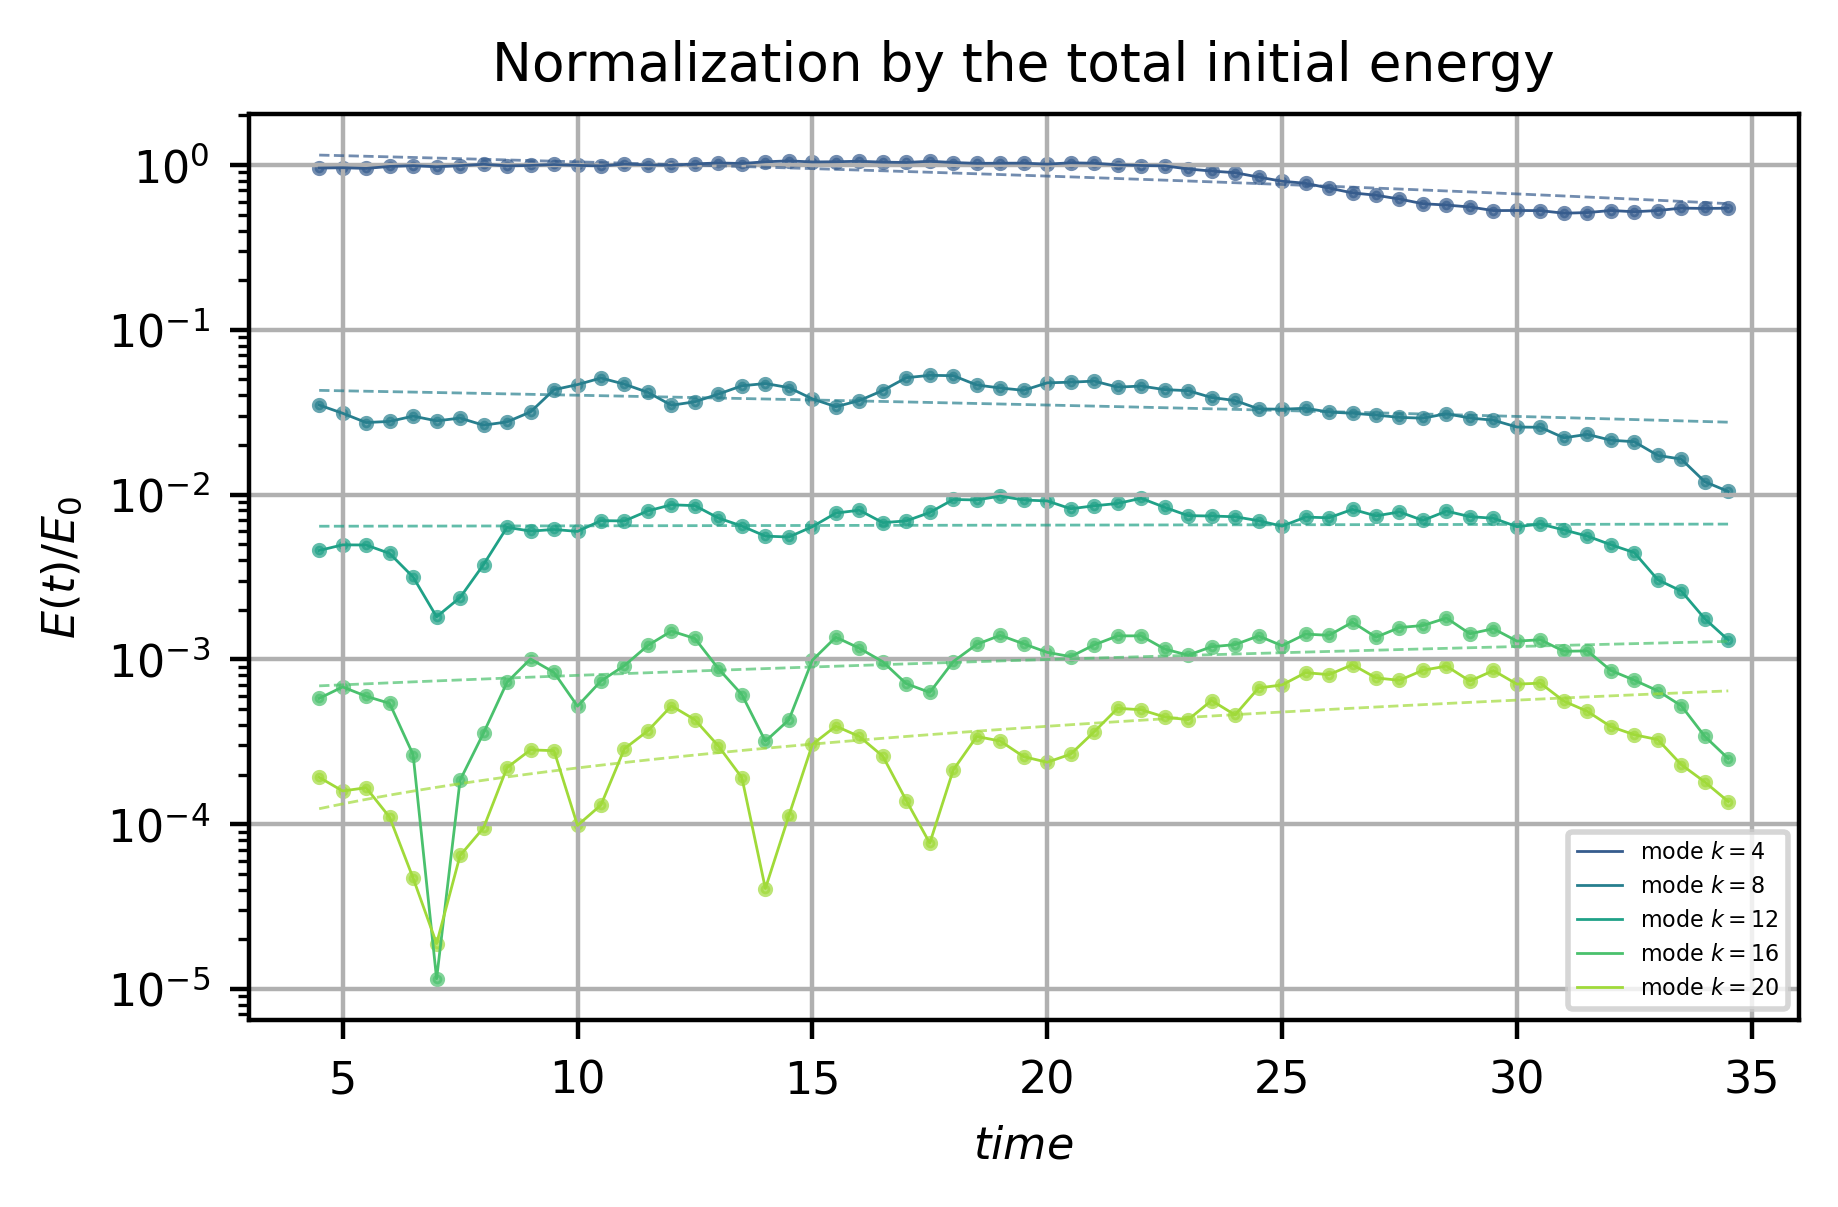

In [18]:
import numpy as np
import matplotlib.pyplot as plt

time = case7.t
time = time[::5]
fig = plt.figure(figsize=[5, 3])
ax_main = plt.gca()
slopes = []
for i in range(len(mode_total)-5):
    initial = np.sum(mode_total[0][0])
    mode_total_norm = [x/E0 for x in mode_total[i]]
    plt.plot(time[:-1]-tstart, mode_total_norm, '-', color=plt.cm.get_cmap('viridis')((i + 2) / 7), lw=0.5, label=r'mode $k=%.0f$' % (filtered_coordx[i]))
    plt.scatter(time[:-1]-tstart, mode_total_norm, color=plt.cm.get_cmap('viridis')((i + 2) / 7), s=3, alpha=0.7)

    # Ajustar una línea recta a los datos
    coeficientes = np.polyfit(time[:-1]-tstart, mode_total_norm, 1)
    recta = np.poly1d(coeficientes)
    pendiente = coeficientes[0]

    # Generar un rango de valores de x para la recta
    x_recta = np.linspace(min(time[:-1]-tstart), max(time[:-1]-tstart), 100)

    # Calcular los valores de y correspondientes a la recta
    y_recta = recta(x_recta)

    # Graficar la recta de regresión en el conjunto de ejes principal
    plt.plot(x_recta, y_recta, '--', color=plt.cm.get_cmap('viridis')((i + 2) / 7), lw=0.5, alpha=0.7)

    print('k', filtered_coordx[i], 'slope', pendiente)
    slopes.append(pendiente)

ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(loc='lower right', fontsize=4)
ax_main.set_xlabel('$time$')
ax_main.set_yscale('log')
ax_main.set_ylabel('$E(t)/E_{0}$')
ax_main.set_title("Normalization by the total initial energy")
plt.grid(True)


Taking      
$$ \large \beta (k)  \approx \frac{dE(t)}{dt}(k) $$

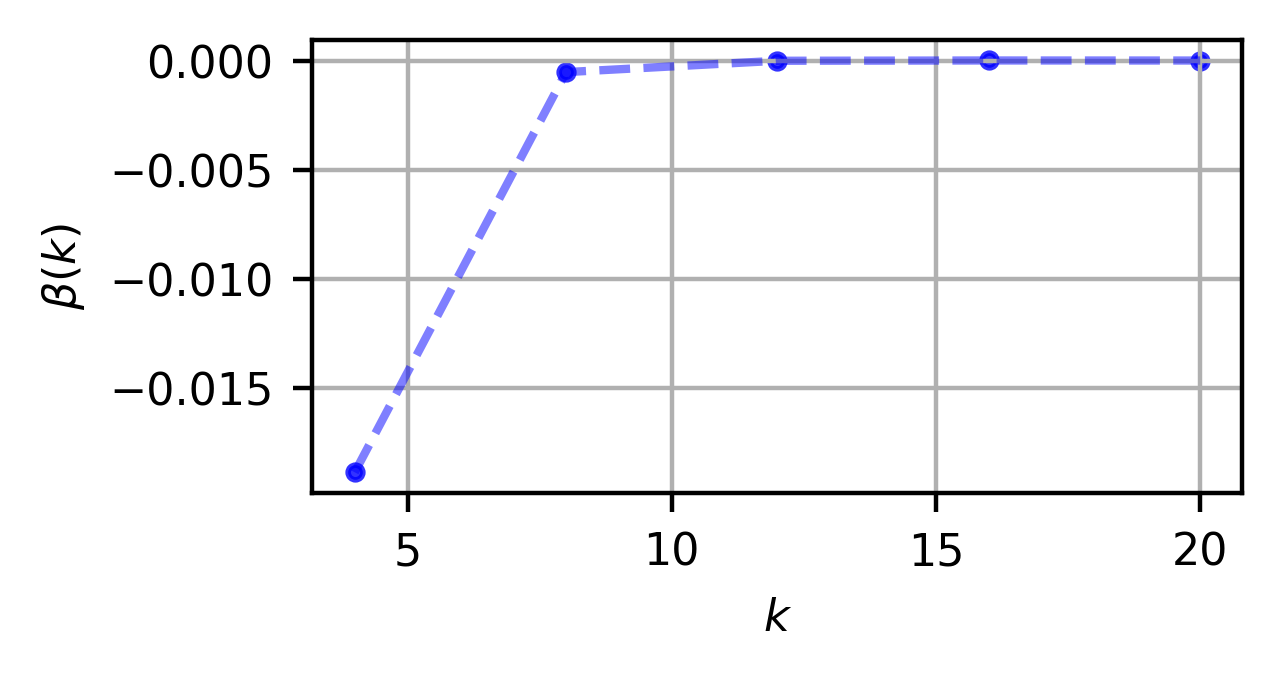

In [19]:
fig = plt.figure(figsize=[3,1.5]); ax = plt.gca()
plt.plot(filtered_coordx[:-5],slopes, '--', c='b', alpha =0.5)
plt.scatter(filtered_coordx[:-5],slopes, s=7, alpha =0.8, c='b')
ax.set_xlabel('$k$')
ax.set_ylabel(r'$ \beta (k) $')  
plt.grid(True)

## 3D FFT

Prepare data for easy processing

In [ ]:
N = 512
kp = 4; omegap = (1*kp)**0.5
time = case7.t

Nt = len(time)

eta_series = np.zeros((Nt,N,N), dtype=np.float32)

for i in range(len(time)):
    #print('time',time[i])
    eta = read_eta(case7,time[i])
    eta_series[i] = eta
print(eta_series.shape)

data = eta_series

/tmp/ipykernel_714567/986960171.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  eta = read_eta(case7,time[i])


The formula for the spatio-temporal fourier transform of a signal f(x,y,t):

$${\displaystyle \large F(k_x, k_y, \omega) = \iiint f(x, y, t) \, e^{-2\pi i (k_x x + k_y y + \omega t)} \, dx \, dy \, dt}$$


In our case:

$${\displaystyle \large E(k_x, k_y, \omega) = \iiint |\eta(x, y, t)|^{2} \, e^{-2\pi i (k_x x + k_y y + \omega t)} \, dx \, dy \, dt}$$

In [ ]:
dt = case7.t[1] - case7.t[0] # sampling intervals, (s)
T = case7.t[-1] - case7.t[0] # total duration
Nt = data.shape[0]


L0 = 2*m.pi; N = 512 # Domain size and grid number in each direction

dx = L0/N     # spatial sampling step along X in (m)
dy = L0/N      # spatial sampling step along Y in (m)
    
t_max = dt * data.shape[0]  # s
x_max = dx * data.shape[1]  # m
y_max = dy * data.shape[2]  # m

rmax = (x_max**2 + y_max**2)**0.5
nr = Nt  #number intervals in r

radii = np.linspace(0,rmax ,nr) 

x = np.linspace(0, x_max, data.shape[1])   # m
y = np.linspace(0, y_max, data.shape[2])   # m
xx,yy = np.meshgrid(x, y, indexing='ij')
    
#omega = np.linspace(-np.pi/dt , np.pi/dt , data.shape[0])                          # frequency (Hz)
theta = np.linspace(-np.pi,np.pi, Nt)

wavenumber =  2*np.pi*np.fft.fftfreq(N,L0/N)
omega = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(Nt,T/Nt))
kx = np.fft.fftshift(wavenumber)
ky = kx


k = wavenumber[0:int(N/2)] #only k>0
#omega = omega[0:int(Nt/2)] #only freq>0

dkx = kx[1] - kx[0]; dky = ky[1] - ky[0]
dk = k[1]-k[0]; dtheta = theta[1]-theta[0]
domega = omega[1]-omega[0]


kx_tile, ky_tile = np.meshgrid(kx,ky)# kx-ky space
Omega, K = np.meshgrid(omega, k) # k-omega space
    
k_tile, theta_tile = np.meshgrid(k,theta)  # k-theta space
kxp_tile, kyp_tile = pol2cart(k_tile, theta_tile)

Note: in the case of the 3D normalisation is multiplying by $ \large \frac{N_{t}}{N^{2}}$

In [ ]:
spectrum3D = np.fft.fftn(data*Nt**0.5/(N*N)**0.5) # FFT normalization 

spectrum3D = np.fft.fftshift(spectrum3D, axes=(0,1,2))

F_3D = (np.absolute(spectrum3D))**2/(N**2)/Nt/(dkx*dky*domega**2) # Per area normalization

#Fcenter_3D = np.fft.fftshift(F_3D, axes=(0,1,2))

The dimensions of data are $(N_{t},N,N)$ corresponding to $(t,x,y)$ when we apply the previous block, the dimensions of F_3D are $(N_{t},N,N)$ corresponding to $(\omega,k_{x},k_{y})$

In [ ]:
F_xyomega = np.zeros((N,F_3D.shape[0],N))
F_kthetaomega = np.zeros((theta.shape[0],F_3D.shape[0],k.shape[0]))
F_komega = np.zeros((256, F_3D.shape[0])) #dimension nr x omega

for i in range(0,F_3D.shape[0]): #loop in the frequencies(omega)
    
    F_xy = F_3D[i] # spectrum F(kx,ky) for each freq i 
    F_xyomega[:,i] = F_xy # each colum of F_xyomega is a freq
    
    F_ktheta = scipy.interpolate.griddata((kx_tile.ravel(),ky_tile.ravel()), F_xy.ravel(), (kxp_tile, kyp_tile), method='nearest') # F(omega,kx,ky) --> F(omega,k,theta) for each freq i
    F_kthetaomega[:,i] = F_ktheta  # each colum of F_kthetaomega is a freq
    
    dtheta = theta[1]-theta[0]
    F_komega[:,i] = np.sum(F_ktheta*k_tile, axis=0)*dtheta #  integral in theta for each freq i so : F(k,theta) ---> F(k) for each omega ---> acces to F(k,omega)


In [ ]:
print(F_kthetaomega.shape)

### $E(kx,ky)$ different times

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ind_time = [0,60,120,180,230,-1] 

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

j = 0

N = 512
L = 2 * np.pi

for i in ind_time:
    
    vmin = -15
    vmax = 0
    levels = np.linspace(vmin, vmax, 200)
    
    ax = axes[j // num_cols, j % num_cols]
    
    norm = np.max(F_3D[i])
    
    im = ax.contourf(kx_tile, ky_tile, np.log(F_xyomega[:, i]),levels = levels, extend='both')
    
    ax.set_aspect('equal')
    ax.set_title(label=r'$\omega_{p} t=%.2f$' % (omegap * (case7.t[i] - tstart)))
    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_ylim([-50, 50])
    ax.set_xlim([-50, 50])
    
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}$'))
    cbar.ax.yaxis.set_major_locator(plt.FixedLocator([ -15, -10, -5, 0]))
    
    j += 1
    
plt.tight_layout()
plt.show()

### $E(kx,ky)$ in average on time 

In [ ]:
''' Solve the problem with colorbar and interval '''

fig = plt.figure(figsize=[3,2]); ax = plt.gca()
F_kxky = np.average(F_xyomega, axis=1) #average in time , also we can select a specific time --> interesting to see before and after microbreaking 
psd = plt.pcolormesh(kx_tile, ky_tile,np.log(F_kxky) , shading= 'auto')#,vmin=-30, vmax= 0)
plt.xlabel(r"$kx$")#, labelpad=0)
plt.ylabel('$ky$')#, labelpad=0)

# Definir el radio
r = [4,8,12,16]
angle = np.linspace(0, 2*np.pi, 100)
i=0

for radio in r:
    x = radio * np.cos(angle)
    y = radio * np.sin(angle)
    
    plt.plot(x,y, ls = '--', alpha = 0.5, color='w', lw=0.5, label = r'$mode k=%.0f$'% (filtered_coordx[i]))
    i+=1

ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
#cbaxes = fig.add_axes([0.4h, -0.2, 0.5, 0.04]) 
cbar = plt.colorbar(psd,  orientation='vertical')

### $E(k, \theta) $ in different times

In [ ]:
ind_time = [0,60,120,180,230,-1] 

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

j = 0

N = 512
L = 2 * np.pi

for i in ind_time:
    
    vmin = -15
    vmax = 0
    levels = np.linspace(vmin, vmax, 200)
    
    ax = axes[j // num_cols, j % num_cols]

    im = ax.contourf(k_tile, theta_tile, np.log(F_kthetaomega[:,i]),levels = levels, extend='both')
    
    ax.set_title(label=r'$\omega_{p} t=%.2f$' % (omegap * (case7.t[i] - tstart)))
    ax.set_xlabel('$k$')
    ax.set_ylabel(r"$ \theta $")
    ax.set_xlim([0, 100])
    
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}$'))
    cbar.ax.yaxis.set_major_locator(plt.FixedLocator([ -15, -10, -5, 0]))
    
    j += 1
    
plt.tight_layout()
plt.show()

### $E(k, \theta) $ averaged in time

In [ ]:
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
print('ak', case7.ak, 'emax',case7.emax , 'time frames', eta_series.shape[0])
F_kthetaav = np.average(F_kthetaomega, axis=1)  #also we can select a specific time --> interesting to see before and after microbreaking
pu = plt.axvline( x=4, ls = '--', c ='w', alpha = 0.3, lw=0.5, label = r"$k=4$")
pu = plt.axvline( x=8, ls = '--', c ='r', alpha = 0.5, lw=0.5, label = r"$k=8$")
pu = plt.axvline( x=12, ls = '--', c ='y', alpha = 0.5, lw=0.5, label = r"$k=12$")
pu = plt.axvline( x=16, ls = '--', c ='g', alpha = 0.5, lw=0.5, label = r"$k=16$")
psd = plt.pcolormesh(k,theta,np.log(F_kthetaav), shading= 'auto')
plt.scatter(4,-m.pi,marker ='*', s=1, alpha= 1, c='w' )
plt.scatter(4,m.pi,marker ='*', s=1, alpha= 1, c='w' )
plt.scatter(4,0,marker ='*', s=1, alpha= 1, c='w' )
plt.ylabel(r"$\theta$", labelpad=0)
plt.xlabel('$k$', labelpad=0)
plt.legend(loc='upper right', fontsize=4)
ax.set_xlim([0,100])
cbar = plt.colorbar(psd, orientation='vertical')

## <span style="color:red"> THIS IS TEST TO SEE IF I CAN UNDERSTAND WHY I HAVE THE LINES IN $E(\omega, k)$ </span>

In [ ]:

'''
F_xyomega = np.zeros((N,F_3D.shape[0],N))
F_kthetaomega = np.zeros((theta.shape[0],F_3D.shape[0],k.shape[0]))
F_komega = np.zeros((256, F_3D.shape[0])) #dimension nr x omega

for i in range(0,F_3D.shape[0]):
    F_xy = F_3D[i]
    F_xyomega[:,i] = F_xy
    F_ktheta = scipy.interpolate.griddata((kx_tile.ravel(),ky_tile.ravel()), F_xy.ravel(), (kxp_tile, kyp_tile), method='nearest')
    F_kthetaomega[:,i] = F_ktheta
    dtheta = theta[1]-theta[0]
    #print(F_xy.shape, F_ktheta.shape,k_tile.shape, dtheta.shape)
    F_komega[:,i] = np.sum(F_ktheta*k_tile, axis=0)*dtheta # axis 0 -> integral in time


'''


#when we take F_kthetaomega[i] we take the row i of F_kthetaomega , which dimension is (310, 310, 256) so we take different heights? 

ind_time = [0,60,120,180,230,-1] # if i take the first as 10 the line is not there 

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 6))

j = 0

N = 512
L = 2 * np.pi

for i in ind_time:
    
    vmin = -15
    vmax = 0
    levels = np.linspace(vmin, vmax, 200)
    
    ax = axes[j // num_cols, j % num_cols]
    
    #F_komega1 = np.sum(F_kthetaomega[:,i]*k_tile, axis=0)*dtheta # F(k)
    
    #print(F_komega1.shape, k.shape, omega.shape)
    
    ax.contourf(k,omega,np.log(F_kthetaomega[i]), levels = levels , extend='both')
    
    
    im = plt.contourf(k,omega,np.log(F_kthetaomega[i]),levels = levels, extend='both')                      #.contourf(k_tile, Omega, np.log(F_komega.T),levels = levels, extend='both')
    
    ax.plot(k, (k*g)**0.5,':', lw =0.5 , c ='w', label = r"$\omega= \sqrt{gk}$")
    
    ax.set_title(label=r'$\omega_{p} t=%.2f$' % (omegap * (case7.t[i] - tstart)))
    ax.set_xlabel('$k$')
    ax.set_ylabel(r"$ \omega$")
    ax.set_xlim([0, 50])
    
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
    
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}$'))
    cbar.ax.yaxis.set_major_locator(plt.FixedLocator([ -15, -10, -5, 0]))
    
    j += 1
    
plt.tight_layout()
plt.show()

### $E(\theta, \omega)$

In [ ]:
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
#print(F_komega.shape)
pa = plt.pcolormesh(k,omega,np.log(F_komega.T),shading='nearest') #{'flat', 'nearest', 'gouraud', 'auto'}

print(F_komega.shape)
omega_max=[]


for xk in filtered_coordx:
    max_indexk = np.argmax(np.log(F_komega[int(xk),:]))
    omega_max.append(np.abs(omega[max_indexk]))



omega_max = np.array(omega_max)
filtered_coordx = np.array(filtered_coordx)

c = (9.8*m.pi/2 + 1 *2/(m.pi*850))**0.5
rho =9.8
sigma = 1

#print('k value' , filtered_coordx,'omega value',omega_max,omega_max.shape)

pu = plt.scatter(filtered_coordx , np.array(omega_max),marker='*',s=0.5, c ='k', alpha = 0.7)

pu = plt.axvline( x=4, ls = '--', c ='k', alpha = 0.5, lw=0.5, label = r"$k=4$")
pu = plt.axvline( x=8, ls = '--', c ='r', alpha = 0.5, lw=0.5, label = r"$k=8$")
pu = plt.axvline( x=12, ls = '--', c ='y', alpha = 0.5, lw=0.5, label = r"$k=12$")
pu = plt.axvline( x=16, ls = '--', c ='g', alpha = 0.5, lw=0.5, label = r"$k=16$")


ak = case7.ak
kp = 4
g = 1
lc = 0.44/kp
omegap = (kp*g)**0.5
omega_lc = (2*np.pi/lc*g + g/kp**2/200*(2*np.pi/lc)**3)**0.5

print('ak',ak)

plt.plot(filtered_coordx , (omega_max),':',lw=0.5, c ='k', alpha = 0.7)

# Perform linear regression
slope, intercept = np.polyfit(filtered_coordx[:3], omega_max[:3], deg=1)

# Plot the line
plt.plot(k, intercept + slope * k, 'k', lw=0.5,  alpha = 0.7,
         label=r'$%.2f + %.2f \cdot k$' % (intercept, slope))


plt.plot(k, (k*g)**0.5,':', lw =0.5 , c ='w', label = r"$\omega= \sqrt{gk}$")

plt.ylabel('$\omega$', labelpad=0)
plt.xlabel('$k$', labelpad=0)
plt.legend(loc='upper right', fontsize=4)
ax.set_xlim([0,30])
ax.set_ylim([0,30])
#cbaxes = fig.add_axes([0.4, -0.2, 0.5, 0.04]) 
cbar = plt.colorbar(pa, orientation='vertical')

In [ ]:
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
ratio = omega_max/filtered_coordx
#print('k value' , filtered_coordx.shape,'omega value',omega_max, 'ratio', ratio.shape)

plt.plot(filtered_coordx[:-1], ratio[:-1] , 'o-' , alpha =0.7)
ax.set_ylim([0,1])
plt.ylabel('$\omega / k$', labelpad=0)
plt.xlabel('$k$', labelpad=0)
plt.grid(True)

# Representation spatio-temporal energy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111, projection='3d')
rango = (0, 50)

# Filtrar los valores de K, Omega y F_komega dentro del rango deseado
k_filtered = np.where((K >= rango[0]) & (K <= rango[1]), K, np.nan)
omega_filtered = np.where((Omega >= rango[0]) & (Omega <= rango[1]), Omega, np.nan)
#F_komega_filtered = np.where((K >= rango[0]) & (K <= rango[1]) & (Omega >= rango[0]) & (Omega <= rango[1]), np.log(F_komega), np.nan)
F_komega_filtered = np.where((K >= rango[0]) & (K <= rango[1]) & (Omega >= rango[0]) & (Omega <= rango[1]), np.log(np.where(F_komega > 0, F_komega, np.nan)), np.nan)

# Crear la superficie 3D

cset = ax.contourf(k_filtered, omega_filtered, F_komega_filtered, zdir='z', offset=-17,alpha=0.8, cmap='viridis',)
surf = ax.plot_surface(k_filtered, omega_filtered, (F_komega_filtered), alpha=0.9,cmap='viridis', rstride=1, cstride=1 , vmin=-15, vmax=0)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('K')
ax.set_ylabel('$\omega$')
ax.set_zlabel('$log(E(k,\omega))$')
ax.set_zlim(-17, 4) 

plt.show()

In [ ]:
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

rango = (0, 50)

# Filtrar los valores de K, Omega y F_komega dentro del rango deseado
k_filtered = np.ma.masked_invalid(np.where((K >= rango[0]) & (K <= rango[1]), K, np.nan))
omega_filtered = np.ma.masked_invalid(np.where((Omega >= rango[0]) & (Omega <= rango[1]), Omega, np.nan))

# Crear una máscara para los valores cero en F_komega
zero_mask = (F_komega != 0)

# Calcular el logaritmo solo para los valores diferentes de cero
F_komega_log = np.zeros_like(F_komega)
F_komega_log[zero_mask] = np.log(F_komega[zero_mask])

# Filtrar los valores de F_komega_log dentro del rango deseado
F_komega_filtered = np.ma.masked_invalid(np.where((K >= rango[0]) & (K <= rango[1]) & (Omega >= rango[0]) & (Omega <= rango[1]), F_komega_log, np.nan))

# Crear la superficie 3D
cset = ax.contourf(k_filtered, omega_filtered, F_komega_filtered, zdir='z', offset=-17,alpha=0.8, cmap='viridis',)
surf = ax.plot_surface(k_filtered, omega_filtered, F_komega_filtered, alpha=0.9, cmap='viridis', rstride=1, cstride=1, vmin=-15, vmax=0)


fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('K')
ax.set_ylabel('$\omega$')
ax.set_zlabel('$\log(E(k,\omega))$')
ax.set_zlim(-17, 4)

plt.show()
'''